In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [3]:
# Preprocess: Zero Center normalization
img_size = 28

x_train = x_train_org.astype('float32')
x_test = x_test_org.astype('float32')

x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

x_train = x_train.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

y_train = y_train_org
y_test = y_test_org

In [4]:
print('X shape: ', x_train.shape)
print('y shape: ', y_train.shape)

X shape:  (60000, 28, 28, 1)
y shape:  (60000,)


In [5]:
# Model architecture

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(84, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

C:\Users\Mehdi.Omidshafiee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 84)                  │             336 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137,454 (536.93 KB)

 Trainable params: 136,726 (534.09 KB)

 Non-trainable params: 728 (2.84 KB)

In [8]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [9]:
%%time
# Fit Model

history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=256,
                    epochs=20,
                    validation_split=0.2
                    )


Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 124ms/step - loss: 0.6163 - sparse_categorical_accuracy: 0.8154 - val_loss: 4.4933 - val_sparse_categorical_accuracy: 0.1462
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - loss: 0.0771 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.9703 - val_sparse_categorical_accuracy: 0.6873
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0662 - val_sparse_categorical_accuracy: 0.9792
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 0.0357 - sparse_categorical_accuracy: 0.9899 - val_loss: 0.0388 - val_sparse_categorical_accuracy: 0.9871
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 0.0285 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.0374 - val_sparse_categorical_accuracy: 0.9889
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 0.0238 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.0414 - val_sparse_categorical_acc

In [10]:
model.save('./models/model_batch_norm_cnn.keras')
model.save_weights('./models/model_batch_norm_cnn.weights.h5')

In [11]:
# loss, accuracy = model.evaluate(X_test_s, y_test)
result = model.evaluate(x_test, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0509 - sparse_categorical_accuracy: 0.9888


[0.03562917560338974, 0.9915000200271606]

In [13]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

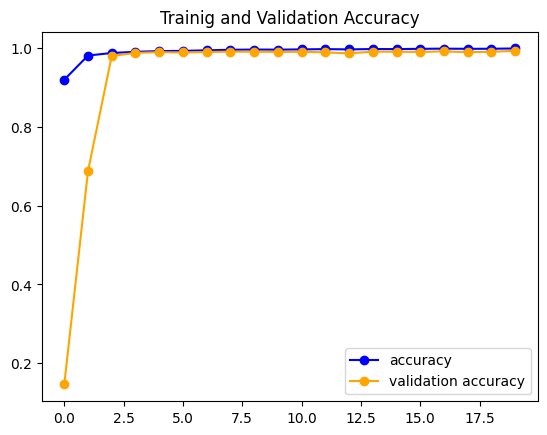

In [18]:
epochs = range(len(history.history['val_sparse_categorical_accuracy']))

plt.plot(epochs, history.history['sparse_categorical_accuracy'], marker='o', color='blue',label='accuracy')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], marker='o' ,color='orange' ,label='validation accuracy')
plt.title('Trainig and Validation Accuracy')

plt.legend()

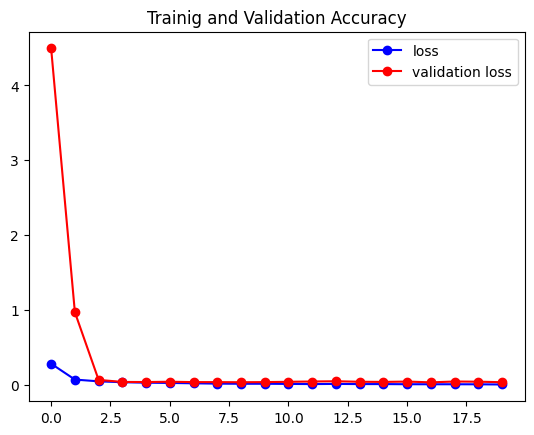

In [19]:
epochs = range(len(history.history['loss']))

plt.plot(epochs, history.history['loss'],  marker='o', color='blue',label='loss')
plt.plot(epochs, history.history['val_loss'],  marker='o', color='red',label='validation loss')
plt.title('Trainig and Validation Loss')

plt.legend()